In [1]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [127]:
tickers = ['SPY', 'TLT']

start = dt.datetime(2007, 1, 1)
end = dt.datetime(2021, 1, 1)

data = pdr.get_data_yahoo(tickers, start, end)

data = data['Adj Close']

In [128]:
ma = data['SPY'].rolling(200).mean()

signal_line = data['SPY'] - ma
signal_line = signal_line.apply(np.sign)

In [129]:
log_return = np.log(data/data.shift())

In [130]:
rtn = signal_line.clip(lower=0).shift(1)*log_return['SPY']
rtn = rtn - (signal_line.clip(upper=0).shift())*log_return['TLT']

In [131]:
rtn.loc['2008':].cumsum().apply(np.exp)

Date
2008-01-02    1.014403
2008-01-03    1.013005
2008-01-04    1.013219
2008-01-07    1.017626
2008-01-08    1.016444
                ...   
2020-12-24    3.486034
2020-12-28    3.515982
2020-12-29    3.509275
2020-12-30    3.514282
2020-12-31    3.532137
Length: 3274, dtype: float64

In [132]:
log_return['SPY'].loc['2008':].cumsum().apply(np.exp)

Date
2008-01-02    0.991245
2008-01-03    0.990767
2008-01-04    0.966486
2008-01-07    0.965666
2008-01-08    0.950072
                ...   
2020-12-24    3.290065
2020-12-28    3.318329
2020-12-29    3.311998
2020-12-30    3.316724
2020-12-31    3.333576
Name: SPY, Length: 3274, dtype: float64

<IPython.core.display.Javascript object>


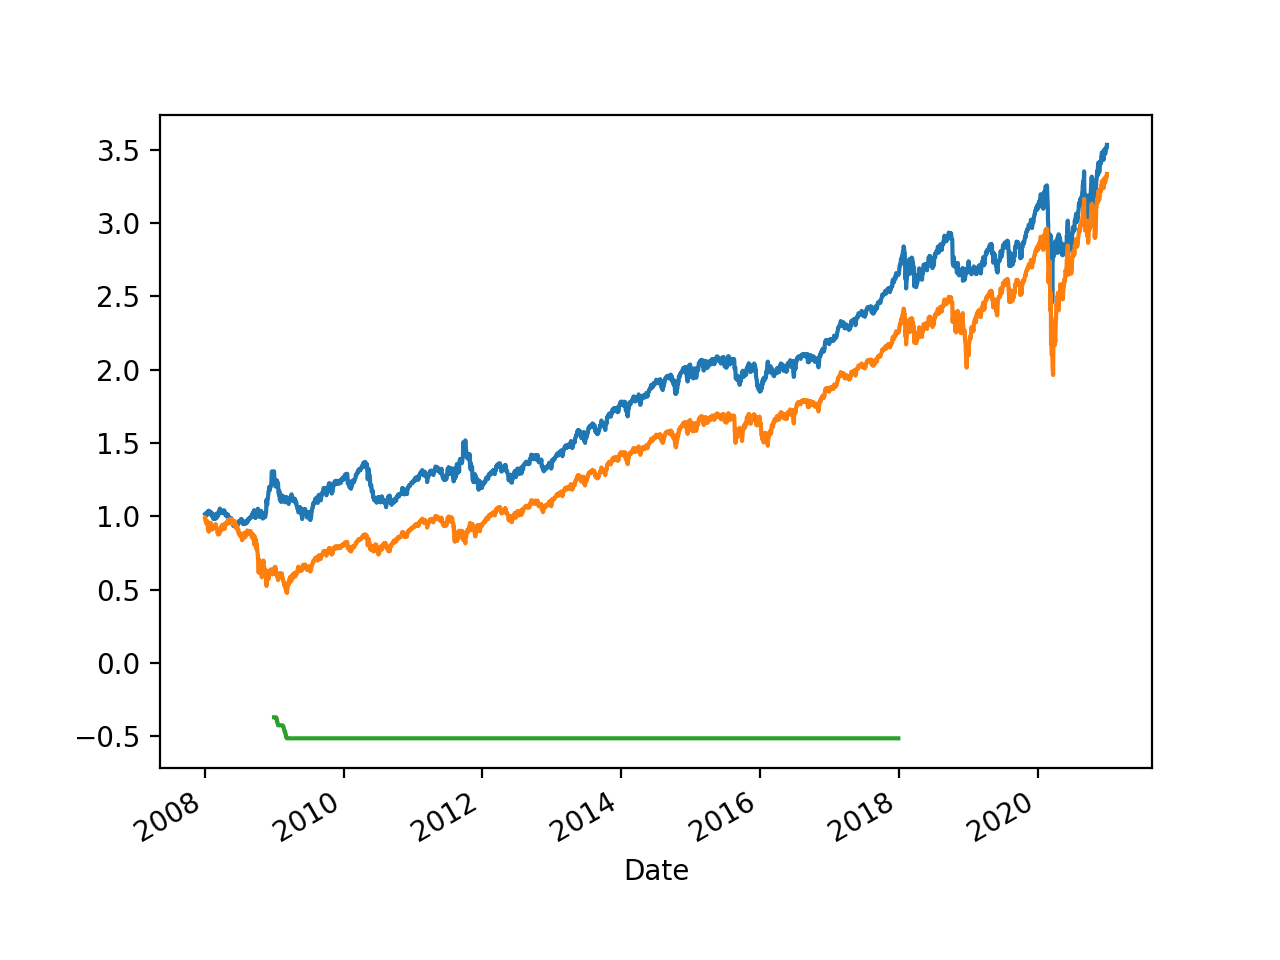

<AxesSubplot:xlabel='Date'>

In [134]:
fig, ax = plt.subplots()

rtn.loc['2008':].cumsum().apply(np.exp).plot(ax=ax, label='Backtest')
log_return['SPY'].loc['2008':].cumsum().apply(np.exp).plot(ax=ax, label='SPY')

In [175]:
def calculate(log_return, start, end):
    years = int(end) - int(start)
    
    data = log_return.loc[start:end]
    
    cagr = np.exp(data.sum())**(1/years) - 1
    
    norm = data.cumsum().apply(np.exp)
    
    rolling_max = norm.rolling(252).max()
    daily_drawdown = norm/rolling_max - 1
    drawdown = daily_drawdown.cummin().iloc[-1]

    volatility = data.std()*(252**.5)
    
    return cagr, drawdown, volatility

In [176]:
calculate(log_return['SPY'], '2008', '2017')

(0.09426629799420594, -0.5148146413395673, 0.2032989015047215)

In [177]:
calculate(rtn, '2008', '2017')

(0.11410556315936682, -0.2530085058434649, 0.14464287771507248)

In [178]:
calculate(log_return['SPY'], '2010', '2019')

(0.15035201057709546, -0.19348927851017517, 0.14723611894184221)

In [179]:
calculate(rtn, '2010', '2019')

(0.10622682341352885, -0.22186467077742011, 0.13279910225623545)

In [225]:
def visualize(backtest, spy, start, end):
    spy_cagr, spy_drawdown, spy_vol = calculate(spy, start, end)
    bt_cagr, bt_drawdown, bt_vol = calculate(backtest, start, end)

    fig, ax = plt.subplots(2, 2)
    
    spy.loc[start:end].cumsum().apply(np.exp).plot(ax=ax[0, 0], label='SPY')
    backtest.loc[start:end].cumsum().apply(np.exp).plot(ax=ax[0, 0], label='Backtest', c='c')
    ax[0, 0].legend()
    
    x = ['SPY\n' + str(round(spy_cagr, 3)*100)+'%', 'Backtest\n' + str(round(bt_cagr, 3)*100)+'%']
    ax[0, 1].bar(x , [spy_cagr, bt_cagr], color=['b', 'c'])
    ax[0, 1].set_title("CAGR")
    
    x = ['SPY\n' + str(round(spy_drawdown, 3)*100)+'%', 'Backtest\n' + str(round(bt_drawdown, 3)*100)+'%']
    ax[1, 0].bar(x, [spy_drawdown, bt_drawdown], color=['b', 'c'])
    ax[1, 0].set_title("Drawdown")

    x = ['SPY\n' + str(round(spy_vol, 3)*100)+'%', 'Backtest\n' + str(round(bt_vol*100, 1))+'%']
    ax[1, 1].bar(x, [spy_vol, bt_vol], color=['b', 'c'])
    ax[1, 1].set_title("Volatility")


    plt.tight_layout()

<IPython.core.display.Javascript object>


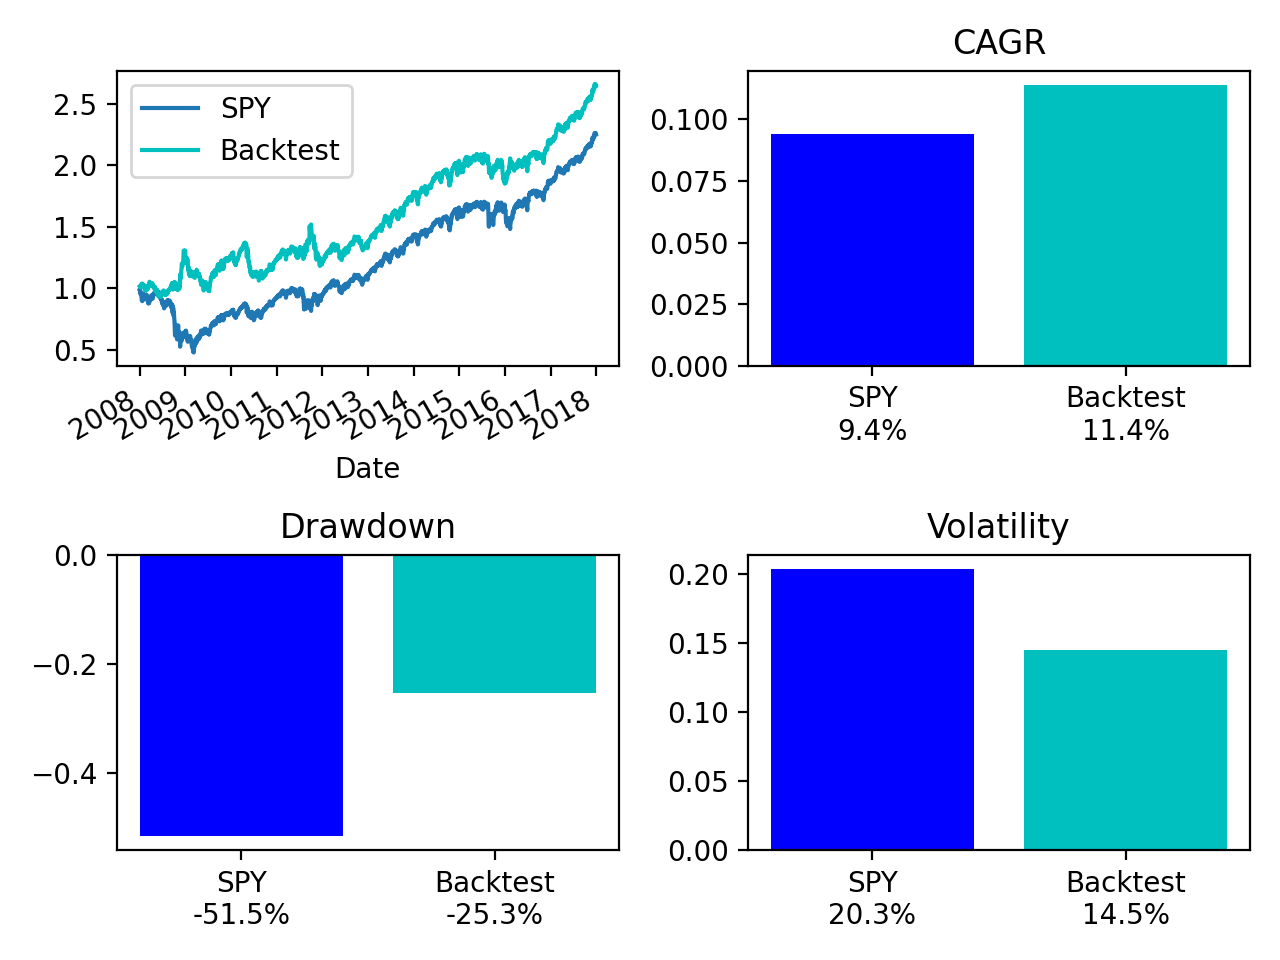

In [226]:
visualize(rtn, log_return['SPY'], '2008', '2017')